Text(0.5, 1.0, 'Original image')

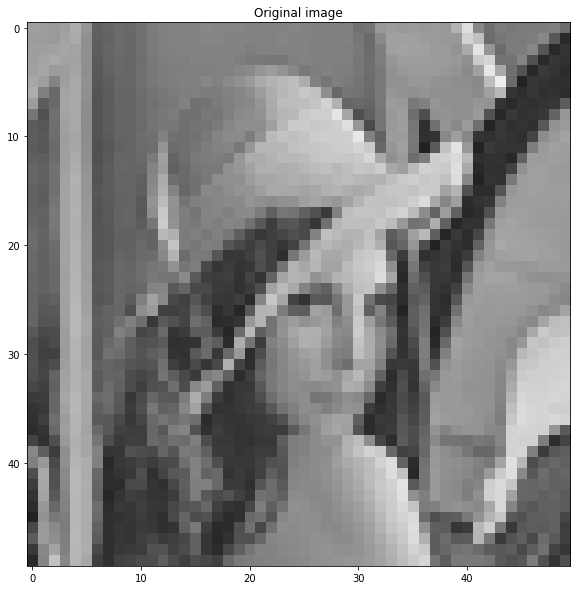

In [177]:
import math
import numpy as np
import matplotlib.pyplot as plt
import requests
from PIL import Image
from io import BytesIO


#url = 'https://upload.wikimedia.org/wikipedia/en/7/7d/Lenna_%28test_image%29.png'

url = 'https://www.researchgate.net/profile/Tao-Chen-87/publication/3935609/figure/fig1/AS:394647298953219@1471102656485/8-bit-256-x-256-Grayscale-Lena-Image_Q320.jpg'
response = requests.get(url)
img = Image.open(BytesIO(response.content)).convert('L')
img.thumbnail((50, 50), Image.ANTIALIAS)

# display the image
figsize = (10,10)
plt.figure(figsize=figsize)

plt.imshow(img, cmap='gray', vmin=0, vmax=255)
plt.title("Original image")



In [178]:
class Transform:
  image = None
  def __init__(self, image):
    self.image = image
  def post_process_image(self, image):
        a = 0
        b = 255
        c = np.min(image)
        d = np.max(image)
        rows, columns = np.shape(image)
        image1 = np.zeros((rows, columns), dtype=int)
        for i in range(rows):
            for j in range(columns):
                if (d-c) == 0:
                    image1[i, j] = ((b - a) / 0.000001) * (image[i, j] - c) + a
                else:
                    image1[i, j] = ((b - a) / (d - c)) * (image[i, j] - c) + a

        return np.uint8(image1)
        
  def filtering(self):
        image = self.image
        shape = np.shape(image)
        img = np.asarray(image)

        fft = self.forward_transform(img)
        shift_fft = np.fft.fftshift(fft)
        mag_dft = np.log(np.abs(shift_fft))
        dft = self.post_process_image(mag_dft)
        
        return np.uint8(dft)

  def forward_transform(self, matrix):
      rows, columns = np.shape(matrix)
      matrix1 = np.zeros((rows, columns), dtype=complex)
      for u in range(rows):
          for v in range(columns):
              a = []
              for i in range(rows):
                  for j in range(columns):
                    omega = np.exp(-2 * math.pi * 1J * (((u * i) / rows) + ((v * j) / columns)))
                    a.append(matrix[i][j] * omega)
              matrix1[u, v] = sum(a)
      return matrix1

Text(0.5, 1.0, 'Discrete Fourier Transform')

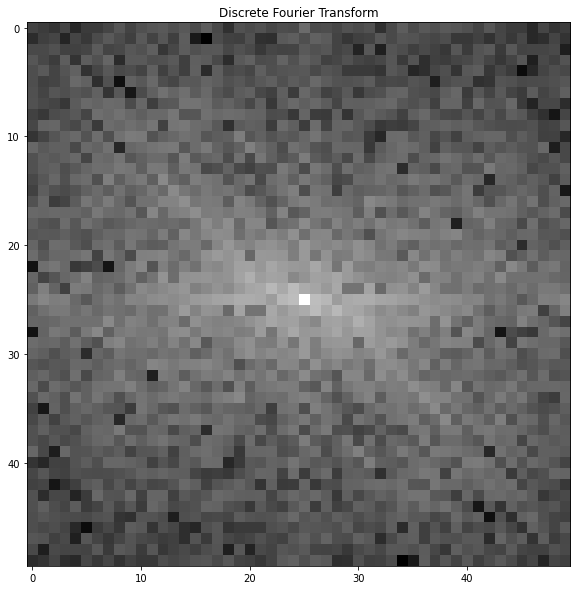

In [179]:
dft_object = Transform(img)

dft = dft_object.filtering()

# display the image
figsize = (10,10)
plt.figure(figsize=figsize)

plt.imshow(dft, cmap='gray', vmin=0, vmax=255)
plt.title("Discrete Fourier Transform")
